<a href="https://colab.research.google.com/github/abhixshek/chollet-deep-learning/blob/master/chollet_ch2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from tensorflow import keras

In [2]:
keras.__version__

'3.8.0'

## The mathematical building blocks of neural networks

The problem we’re trying to solve here is to classify grayscale images of handwritten digits (28 × 28 pixels) into their 10 categories (0 through 9). We’ll use the MNIST
dataset, a classic in the machine learning community, which has been around almost
as long as the field itself and has been intensively studied. It’s a set of 60,000 training
images, plus 10,000 test images, assembled by the National Institute of Standards and
Technology (the NIST in MNIST) in the 1980s. You can think of “solving” MNIST as
the “Hello World” of deep learning—it’s what you do to verify that your algorithms are
working as expected.

In [3]:
from tensorflow.keras.datasets import mnist
# this import statement of mnist module also imports numpy with it. So you don't need to explicity run `import numpy` here

In [4]:
((train_images, train_labels), (test_images, test_labels)) = mnist.load_data()

11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


In [5]:
type(train_images), type(train_labels) # numpy arrays

(numpy.ndarray, numpy.ndarray)

In [6]:
print(train_images.shape)
print(train_labels.shape)
print(test_images.shape)
print(test_labels.shape)

(60000, 28, 28)
(60000,)
(10000, 28, 28)
(10000,)


So this is (m, 28, 28) where `m` is the no. of examples.

In [7]:
train_labels # dtype is uint8

array([5, 0, 4, ..., 5, 6, 8], dtype=uint8)

In [8]:
train_images[0] # dtype is uint8

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   3,
         18,  18,  18, 126, 136, 175,  26, 166, 255, 247, 127,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,  30,  36,  94, 154, 170,
        253, 253, 253, 253, 253, 225, 172, 253, 242, 195,  64,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,  49, 238, 253, 253, 253, 253,
        253, 253, 253, 253, 251,  93,  82,  82,  56,  39,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,  18, 219, 253, 253, 253, 253,
        253, 198, 182, 247, 241,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,  80, 156, 107, 253, 253,
        205,  11,   0,  43, 154,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,  14,   1, 154, 253,
         90,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0, 139, 253,
        190,   2,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,  11, 190,
        253,  70,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,  35,
        241, 225, 160, 108,   1,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         81, 240, 253, 253, 119,  25,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,  45, 186, 253, 253, 150,  27,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,  16,  93, 252, 253, 187,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0, 249, 253, 249,  64,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,  46, 130, 183, 253, 253, 207,   2,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,  39,
        148, 229, 253, 253, 253, 250, 182,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,  24, 114, 221,
        253, 253, 253, 253, 201,  78,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,  23,  66, 213, 253, 253,
        253, 253, 198,  81,   2,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,  18, 171, 219, 253, 253, 253, 253,
        195,  80,   9,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,  55, 172, 226, 253, 253, 253, 253, 244, 133,
         11,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0, 136, 253, 25

In [9]:
train_images[0].dtype

dtype('uint8')

**The network architecture**

In [10]:
from tensorflow.keras import layers
from tensorflow import keras

In [11]:
model = keras.Sequential(
    [layers.Dense(512, activation="relu"),
     layers.Dense(10, activation="softmax")]
)

In [12]:
model.compile(optimizer="rmsprop",
              loss="sparse_categorical_crossentropy",
              metrics=["accuracy"]
              )

In [13]:
train_images = train_images.reshape((60000, 28 * 28))
train_images = train_images.astype("float32") / 255
test_images = test_images.reshape((10000, 28 * 28))
test_images = test_images.astype("float32") / 255


In [14]:
train_images.shape, train_images.dtype

((60000, 784), dtype('float32'))

**"fitting" the model:**

In [15]:
model.fit(train_images, train_labels, epochs=5, batch_size=128)

Epoch 1/5
469/469 ━━━━━━━━━━━━━━━━━━━━ 5s 9ms/step - accuracy: 0.8721 - loss: 0.4420
Epoch 2/5
469/469 ━━━━━━━━━━━━━━━━━━━━ 5s 11ms/step - accuracy: 0.9651 - loss: 0.1162
Epoch 3/5
469/469 ━━━━━━━━━━━━━━━━━━━━ 4s 9ms/step - accuracy: 0.9774 - loss: 0.0753
Epoch 4/5
469/469 ━━━━━━━━━━━━━━━━━━━━ 5s 9ms/step - accuracy: 0.9856 - loss: 0.0495
Epoch 5/5
469/469 ━━━━━━━━━━━━━━━━━━━━ 6s 10ms/step - accuracy: 0.9891 - loss: 0.0373


**using the model to make predictions**

In [16]:
test_digits = test_images[:15]
predictions = model.predict(test_digits)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 65ms/step


In [17]:
predictions.shape

(15, 10)

In [18]:
predictions[0]
# Each number of index i in that array corresponds to the probability that digit image
# test_digits[0] belongs to class i.

array([1.77777039e-07, 1.32698244e-08, 3.90931609e-06, 1.02845755e-04,
       1.08930698e-10, 4.53413733e-08, 1.67928421e-12, 9.99887764e-01,
       5.00469461e-08, 5.16997170e-06], dtype=float32)

In [19]:
predictions[0].argmax()

np.int64(7)

In [20]:
predictions[0][7] # model predicts that this digit image is of class 7 with a probability of 99.9%

np.float32(0.99988776)

In [21]:
test_labels[0] # test label agrees

np.uint8(7)

In [22]:
test_loss, test_acc = model.evaluate(test_images, test_labels)

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9776 - loss: 0.0756


In [23]:
print("test_loss:", test_loss)
print("test accuracy:", test_acc)

test_loss: 0.06130364537239075
test accuracy: 0.9815000295639038


In [24]:
model.metrics_names

['loss', 'compile_metrics']

#### Data representations for neural networks:

In [25]:
print(train_images.ndim) # 2D array or rank-2 tensor
print(train_labels.ndim) # 1D array

2
1


In [26]:
import numpy as np
a = np.array([12]) #1 dimensional array
b = np.array(12) # 0 dimensional array, i.e. a scalar, rank-0 tensor

In [27]:
b

array(12)

In [28]:
5 + b

np.int64(17)

In [29]:
b + 5

np.int64(17)

In [30]:
b.ndim

0

In [31]:
b.shape # empty tuple

()

**Vector or rank-1 tensor**

In [32]:
a = np.array([4, 6, 8, 2]) # 1D tensor, rank-1 tensor, 1D array, vector

In [33]:
a

array([4, 6, 8, 2])

In [34]:
a.ndim

1

In [36]:
a.shape # 1 element tuple

(4,)

In [37]:
len(a)

4

Since a has 5 elements, it can also be called a 5-dimensional vector or 5D vector.

**NOTE**: Dont confuse, 5D vector(only 1 axis) with 5D tensor (5 axes, each axis may be having some dimensionality.)

In [38]:
a.dtype

dtype('int64')

**Matrices**

In [39]:
a = np.array([
    [77, 454, 3, 6, 21],
    [89, 343, 66, 73, 0],
    [56, 88, 23, 21, 9]]
            )
# matrix or 2D tensor or rank-2 tensor
# rectangular grid of numbers.
# consists of rows and columns

In [42]:
a

array([[ 77, 454,   3,   6,  21],
       [ 89, 343,  66,  73,   0],
       [ 56,  88,  23,  21,   9]])

In [40]:
a.ndim

2

In [41]:
a.shape

(3, 5)

**Rank-3 tensors and higher-rank tensors**

In [44]:
# if you pack matrices in an array, you get a 3D tensor or rank-3 tensor.
a = np.random.randint(100, size=(2,4,5))
# rank-3 tensor or 3D tensor

In [45]:
a

array([[[24, 59, 20, 90, 54],
        [89, 97, 40, 32, 55],
        [65, 29, 77, 99, 71],
        [65, 57, 63, 99, 75]],

       [[45, 24, 95, 86, 67],
        [80, 52, 31,  2, 52],
        [10, 91, 40, 64, 19],
        [28, 43,  2, 19, 85]]])

In [46]:
a.ndim

3

In [47]:
a.shape

(2, 4, 5)

In [48]:
from tensorflow.keras.datasets import mnist

(train_images, train_labels), (test_images, test_labels) = mnist.load_data()

In [49]:
train_images.ndim

3

In [50]:
train_images.shape
# so we have an array of 60000 matrices of 28x28 integers

(60000, 28, 28)

In [51]:
train_images.dtype

dtype('uint8')

In [52]:
import matplotlib.pyplot as plt

In [56]:
digit = train_images[4]

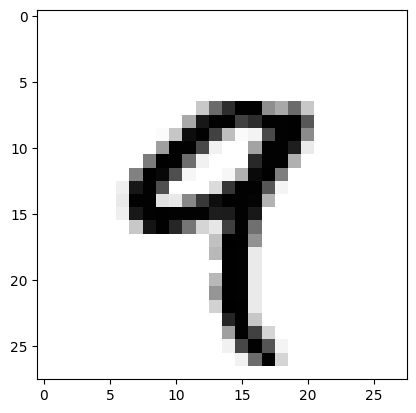

In [58]:
plt.imshow(digit, cmap="binary")

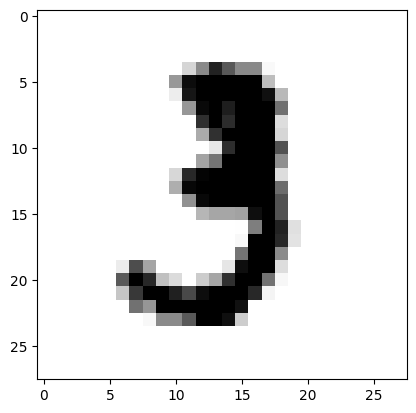

In [60]:
plt.imshow(train_images[10], cmap=plt.cm.binary)
plt.show()

In [64]:
train_labels[10] # the label corresponding to this image

np.uint8(3)

**slicing**

In [66]:
a = np.random.randn(30000, 40, 40)

In [67]:
a.shape

(30000, 40, 40)

In [68]:
my_slice = a[10:100]

In [69]:
my_slice.shape

(90, 40, 40)

In [72]:
my_slice = a[10:100:5] # step size of 5. default step size is 1

In [74]:
my_slice.shape # got rows 10, 15, 20, 25, 30, .. 90, 95, i.e. a total of 18

(18, 40, 40)

In [75]:
my_slice2 = a[10:100:5, :, :] # same as my_slice above. just that we are explicitly saying to include the entire axis along the other 2 dimensions.

In [82]:
np.all(my_slice2 == my_slice)

np.True_

In [86]:
# also equivalent is:
my_slice = a[10:100:5, :40, :40] # 40 is the length along that axis so you are not missing anything. the last index along the axis 1 and 2 is 39.

In [88]:
my_slice.shape

(18, 40, 40)

In [91]:
my_slice[0][39][39] # the last element

np.float64(0.32125344032881986)

In [93]:
my_slice[0][-1][-1] # same as above

np.float64(0.32125344032881986)

In [94]:
batch = train_images[:128]
# batch of 128 images

In [95]:
batch.shape

(128, 28, 28)